In [1]:
# SECCIÓN 1: CONFIGURACIÓN INICIAL E IMPORTACIÓN DE LIBRERÍAS

import numpy as np                           
import tensorflow as tf                      
from tensorflow import keras                 
from tensorflow.keras.preprocessing.text import Tokenizer   
from tensorflow.keras.preprocessing.sequence import pad_sequences 
import matplotlib.pyplot as plt               
from collections import Counter               
import seaborn as sns                         

# Configurar semillas para reproducibilidad
np.random.seed(42)
tf.random.set_seed(42)

print("Librerías importadas y configuración inicial completada")


Librerías importadas y configuración inicial completada


In [2]:
# SECCIÓN 2: GENERACIÓN Y PREPARACIÓN DE DATOS

# 1. CORPUS SIMULADO DE FRASES CON SENTIMIENTOS
print("\nCREANDO CORPUS DE FRASES")

corpus_textos = [
    "me encanta este producto",      
    "es horrible y malo",             
    "muy feliz con la compra",       
    "servicio pesimo y lento",       
    "gran experiencia de usuario",   
    "no funciona para nada",         
    "excelente calidad precio",      
    "pésima atención al cliente",    
    "recomiendo totalmente",         
    "decepcionante resultado",       
    "increíble valor",               
    "horrible experiencia"           
]


# Etiquetas: 1 = Positivo, 0 = Negativo
etiquetas = np.array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0])

print(f"Corpus creado:")
print(f"- Número de frases: {len(corpus_textos)}")
print(f"- Frases positivas: {sum(etiquetas)}")
print(f"- Frases negativas: {len(etiquetas) - sum(etiquetas)}")

# 2. TOKENIZACIÓN - CONVERTIR TEXTO A NÚMEROS
print("\nTOKENIZANDO TEXTO")

# Crear tokenizer 
tokenizer = Tokenizer(
    num_words=100,        
    oov_token="<OOV>"     
                          
)

# Ajustar tokenizer al corpus 
tokenizer.fit_on_texts(corpus_textos)

# Convertir textos a secuencias numéricas
secuencias = tokenizer.texts_to_sequences(corpus_textos)

print(f"Tokenización completada:")
print(f"- Tamaño del vocabulario: {len(tokenizer.word_index)} palabras")
print(f"- Ejemplo de secuencia: '{corpus_textos[0]}' → {secuencias[0]}")

# Mostrar mapeo de palabras a índices
print(f"\n VOCABULARIO:")
for i, (palabra, indice) in enumerate(list(tokenizer.word_index.items())[:10]):
    print(f"   '{palabra}' → {indice}")

# 3. PADDING
print("\nAPLICANDO PADDING")

MAX_LONGITUD = 6  # Longitud máxima de secuencias

# Aplicar padding para que todas las secuencias tengan misma longitud
X_data = pad_sequences(
    secuencias, 
    maxlen=MAX_LONGITUD,   
    padding='post',        
    truncating='post'      
    )

print(f"Padding aplicado:")
print(f"- Forma de X_data: {X_data.shape}") 
print(f"- Longitud máxima: {MAX_LONGITUD} palabras")
print(f"- Ejemplo con padding: {X_data[0]}")

# 4. PREPARAR DATOS DE ENTRENAMIENTO
print("\nPREPARANDO DATOS FINALES")

# Los datos ya están en formato correcto para la red
y_data = etiquetas  

print(f"Datos listos para entrenamiento:")
print(f"- X_data shape: {X_data.shape}")  # (12, 6)
print(f"- y_data shape: {y_data.shape}")  # (12,)






CREANDO CORPUS DE FRASES
Corpus creado:
- Número de frases: 12
- Frases positivas: 6
- Frases negativas: 6

TOKENIZANDO TEXTO
Tokenización completada:
- Tamaño del vocabulario: 38 palabras
- Ejemplo de secuencia: 'me encanta este producto' → [5, 6, 7, 8]

 VOCABULARIO:
   '<OOV>' → 1
   'horrible' → 2
   'y' → 3
   'experiencia' → 4
   'me' → 5
   'encanta' → 6
   'este' → 7
   'producto' → 8
   'es' → 9
   'malo' → 10

APLICANDO PADDING
Padding aplicado:
- Forma de X_data: (12, 6)
- Longitud máxima: 6 palabras
- Ejemplo con padding: [5 6 7 8 0 0]

PREPARANDO DATOS FINALES
Datos listos para entrenamiento:
- X_data shape: (12, 6)
- y_data shape: (12,)


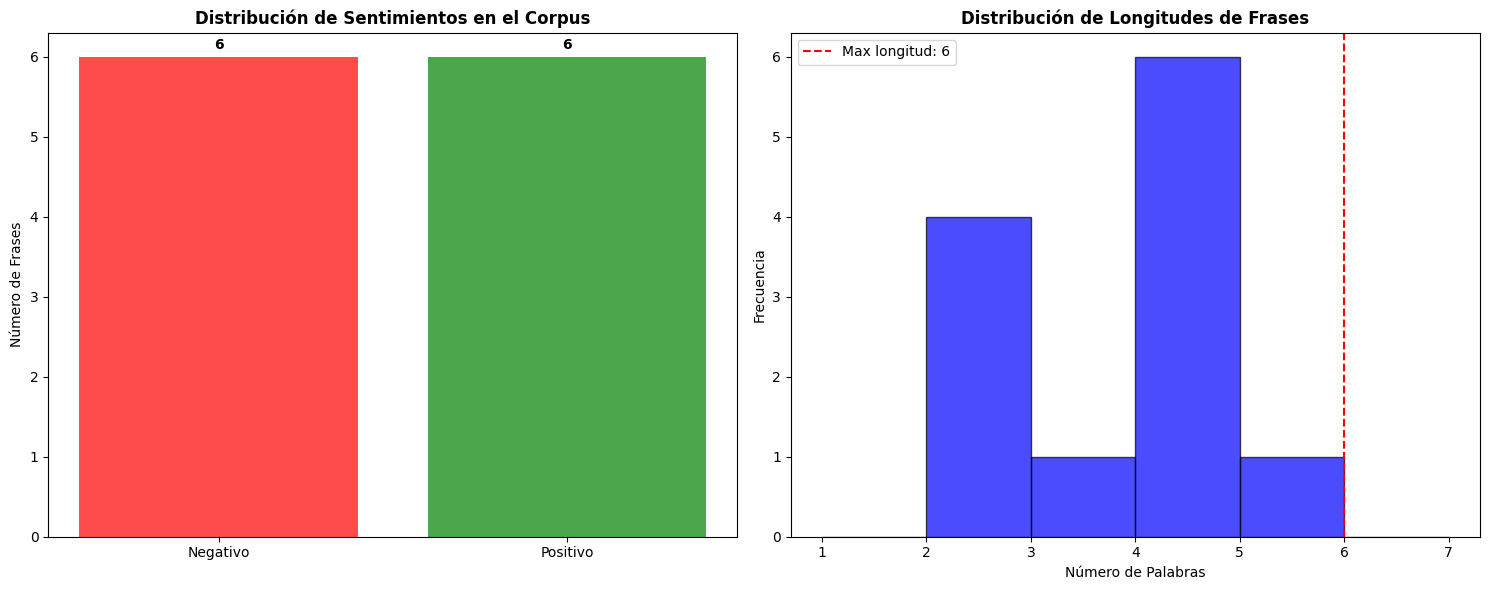

In [3]:
# SECCIÓN 3: VISUALIZACIÓN DE LOS DATOS


# Crear visualizaciones
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 1. DISTRIBUCIÓN DE SENTIMIENTOS 
sentimientos = ['Negativo', 'Positivo']
conteo = [len(etiquetas) - sum(etiquetas), sum(etiquetas)]

axes[0].bar(sentimientos, conteo, color=['red', 'green'], alpha=0.7)
axes[0].set_title('Distribución de Sentimientos en el Corpus', fontweight='bold')
axes[0].set_ylabel('Número de Frases')
# Añadir valores numéricos sobre las barras para claridad
for i, v in enumerate(conteo):
    axes[0].text(i, v + 0.1, str(v), ha='center', fontweight='bold')

# 2. DISTRIBUCIÓN DE LONGITUDES DE FRASES 
longitudes = [len(frase.split()) for frase in corpus_textos]
axes[1].hist(longitudes, bins=range(1, 8), alpha=0.7, color='blue', edgecolor='black')
axes[1].set_title('Distribución de Longitudes de Frases', fontweight='bold')
axes[1].set_xlabel('Número de Palabras')
axes[1].set_ylabel('Frecuencia')
axes[1].axvline(MAX_LONGITUD, color='red', linestyle='--', label=f'Max longitud: {MAX_LONGITUD}')
axes[1].legend()

plt.tight_layout()
plt.show()



In [4]:
# SECCIÓN 4: DEFINICIÓN DE LA ARQUITECTURA LSTM


# Parámetros de la arquitectura
VOCAB_SIZE = len(tokenizer.word_index) + 1  # +1 para el token OOV
DIMENSION_EMBEDDING = 16   
UNITS_LSTM = 32       

# Crear modelo Sequential
model = keras.Sequential([
   
    # CAPA 1: EMBEDDING 
   
    keras.layers.Embedding(
        input_dim=VOCAB_SIZE,        
        output_dim=DIMENSION_EMBEDDING, 
        name='capa_embedding'    
    ),
    
   
    # CAPA 2: LSTM (Long Short-Term Memory)
   
    keras.layers.LSTM(
        units=UNITS_LSTM,    
        name='capa_lstm'   
    ),
    
   
    # CAPA 3: SALIDA
   
    keras.layers.Dense(
        units=1,                
        activation='sigmoid',   
        name='capa_salida'      
    )
])


# Construir el modelo especificando la forma de entrada
model.build(input_shape=(None, MAX_LONGITUD))  
print("Modelo construido exitosamente")

# Mostrar resumen detallado
print("RESUMEN DE ARQUITECTURA")
model.summary()

# Análisis de parámetros (AHORA SÍ FUNCIONA)
print("\ANÁLISIS DE PARÁMETROS")
total_params = model.count_params()
print(f"Total de parámetros entrenables: {total_params:,}")


Modelo construido exitosamente
RESUMEN DE ARQUITECTURA


<>:48: SyntaxWarning: invalid escape sequence '\A'
<>:48: SyntaxWarning: invalid escape sequence '\A'
C:\Users\Maeva\AppData\Local\Temp\ipykernel_760\2356025437.py:48: SyntaxWarning: invalid escape sequence '\A'
  print("\ANÁLISIS DE PARÁMETROS")


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ capa_embedding (Embedding)      │ (None, 6, 16)          │           624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_lstm (LSTM)                │ (None, 32)             │         6,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_salida (Dense)             │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,929 (27.07 KB)

 Trainable params: 6,929 (27.07 KB)

 Non-trainable params: 0 (0.00 B)

\ANÁLISIS DE PARÁMETROS
Total de parámetros entrenables: 6,929


In [5]:
# SECCIÓN 5: COMPILACIÓN DEL MODELO

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("Modelo compilado exitosamente")    

Modelo compilado exitosamente


In [6]:
# SECCIÓN 6: ENTRENAMIENTO DEL MODELO

# Entrenar el modelo
history = model.fit(
    X_data,
    y_data,
    epochs=50,           # Número de épocas 
    batch_size=4,        # Tamaño de lote 
    verbose=1,           # Mostrar barra de progreso
    validation_split=0.2, # 20% para validación
    shuffle=True         # Mezclar datos cada época
)

print("Entrenamiento completado exitosamente")

# Resultados finales del entrenamiento
final_accuracy = history.history['accuracy'][-1]
final_loss = history.history['loss'][-1]
final_val_accuracy = history.history.get('val_accuracy', [None])[-1]
final_val_loss = history.history.get('val_loss', [None])[-1]

print(f"\nRESULTADOS FINALES DEL ENTRENAMIENTO")
print(f"Accuracy final (entrenamiento): {final_accuracy:.4f}")
print(f"Pérdida final (entrenamiento):  {final_loss:.4f}")
if final_val_accuracy:
    print(f"Accuracy final (validación):    {final_val_accuracy:.4f}")
    print(f"Pérdida final (validación):     {final_val_loss:.4f}")


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 171ms/step - accuracy: 0.6667 - loss: 0.6932 - val_accuracy: 0.3333 - val_loss: 0.6963
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5556 - loss: 0.6905 - val_accuracy: 0.3333 - val_loss: 0.6959
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6667 - loss: 0.6895 - val_accuracy: 0.3333 - val_loss: 0.6951
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 1.0000 - loss: 0.6885 - val_accuracy: 0.3333 - val_loss: 0.6942
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 1.0000 - loss: 0.6872 - val_accuracy: 0.3333 - val_loss: 0.6933
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8889 - loss: 0.6856 - val_accuracy: 0.6667 - val_loss: 0.6923
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8889 - loss: 0.6835 - val_accuracy: 0.6667 - val_loss: 0.6913
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7778 - loss: 0.6808 - val_accuracy: 0.6667 - val_loss: 0.6902

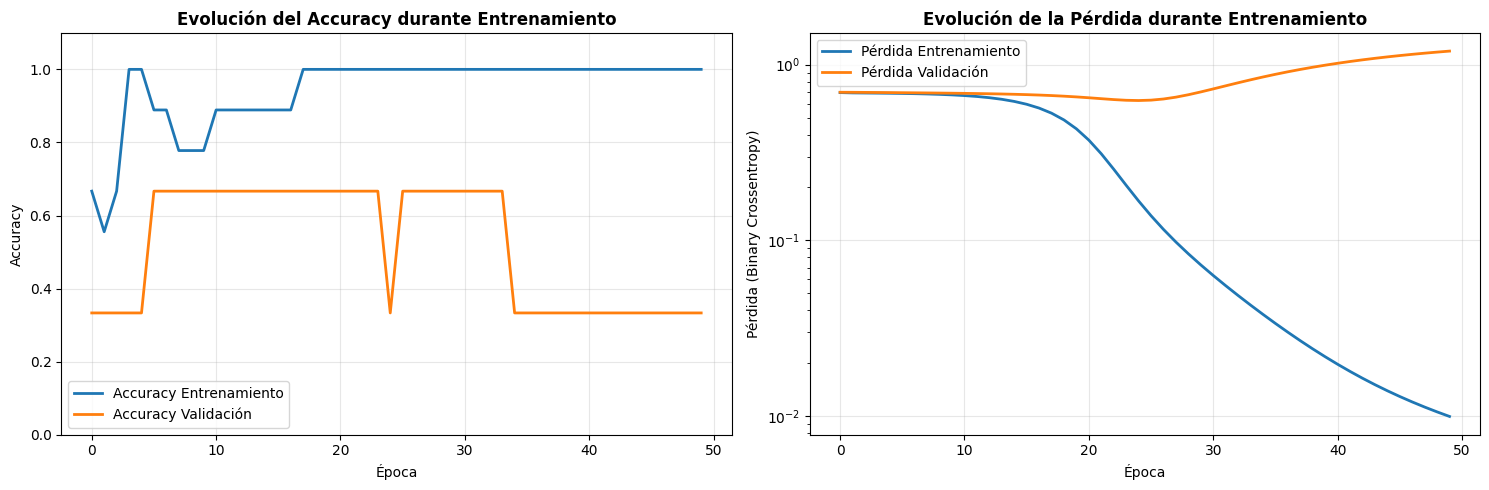

In [7]:
# SECCIÓN 7: EVALUACIÓN Y ANÁLISIS DEL ENTRENAMIENTO


# Crear visualización de curvas de aprendizaje
plt.figure(figsize=(15, 5))

# 1. CURVA DE ACCURACY
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy Entrenamiento', linewidth=2)
if 'val_accuracy' in history.history:
    plt.plot(history.history['val_accuracy'], label='Accuracy Validación', linewidth=2)

plt.title('Evolución del Accuracy durante Entrenamiento', fontweight='bold', fontsize=12)
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(0, 1.1)

# 2. CURVA DE PÉRDIDA
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida Entrenamiento', linewidth=2)
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Pérdida Validación', linewidth=2)

plt.title('Evolución de la Pérdida durante Entrenamiento', fontweight='bold', fontsize=12)
plt.xlabel('Época')
plt.ylabel('Pérdida (Binary Crossentropy)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log') 

plt.tight_layout()
plt.show()

In [9]:
# SECCIÓN 8: PREDICCIÓN CON EL MODELO ENTRENADO


# Frases nuevas para probar el modelo
nuevas_frases = [
    "me gusta mucho este servicio",     
    "odio esta experiencia",            
    "increíble producto recomendado",   
    "terrible y decepcionante",         
    "normal no me convence"             
]

print("FRASES NUEVAS PARA PREDECIR:")
for i, frase in enumerate(nuevas_frases, 1):
    print(f"   {i}. '{frase}'")

# 1. PREPROCESAR NUEVAS FRASES

# Aplicar mismo preprocesamiento que al corpus original
nuevas_secuencias = tokenizer.texts_to_sequences(nuevas_frases)
nuevas_secuencias_padded = pad_sequences(
    nuevas_secuencias, 
    maxlen=MAX_LONGITUD, 
    padding='post',
    truncating='post'
)

# 2. REALIZAR PREDICCIONES
predicciones = model.predict(nuevas_secuencias_padded, verbose=0)



# 3. INTERPRETAR RESULTADOS
def interpretar_prediccion(probabilidad):
    """Convierte probabilidad en sentimiento y confianza"""
    if probabilidad > 0.6:
        sentimiento = "POSITIVO"
        confianza = probabilidad
    elif probabilidad < 0.4:
        sentimiento = "NEGATIVO" 
        confianza = 1 - probabilidad
    else:
        sentimiento = "NEUTRAL/INDECISO"
        confianza = min(probabilidad, 1 - probabilidad)
    
    return sentimiento, confianza




FRASES NUEVAS PARA PREDECIR:
   1. 'me gusta mucho este servicio'
   2. 'odio esta experiencia'
   3. 'increíble producto recomendado'
   4. 'terrible y decepcionante'
   5. 'normal no me convence'


In [10]:
print("\n INTERPRETANDO RESULTADOS ")
for i, (frase, prob) in enumerate(zip(nuevas_frases, predicciones), 1):
    probabilidad = prob[0]
    sentimiento, confianza = interpretar_prediccion(probabilidad)
    
    print(f"{i}. '{frase}'")
    print(f"   → Probabilidad: {probabilidad:.4f}")
    print(f"   → Sentimiento:  {sentimiento}")
    print(f"   → Confianza:    {confianza:.1%}")
    print()




 INTERPRETANDO RESULTADOS 
1. 'me gusta mucho este servicio'
   → Probabilidad: 0.9630
   → Sentimiento:  POSITIVO
   → Confianza:    96.3%

2. 'odio esta experiencia'
   → Probabilidad: 0.9280
   → Sentimiento:  POSITIVO
   → Confianza:    92.8%

3. 'increíble producto recomendado'
   → Probabilidad: 0.9653
   → Sentimiento:  POSITIVO
   → Confianza:    96.5%

4. 'terrible y decepcionante'
   → Probabilidad: 0.0534
   → Sentimiento:  NEGATIVO
   → Confianza:    94.7%

5. 'normal no me convence'
   → Probabilidad: 0.3377
   → Sentimiento:  NEGATIVO
   → Confianza:    66.2%




 EXTRAYENDO EMBEDDINGS 
Embeddings extraídos:
- Forma de pesos: (39, 16)
- Palabras a visualizar: ['<OOV>', 'horrible', 'y', 'experiencia', 'me', 'encanta', 'este', 'producto', 'es', 'malo', 'muy', 'feliz', 'con', 'la', 'compra']
   - Varianza explicada por componentes: 89.75%


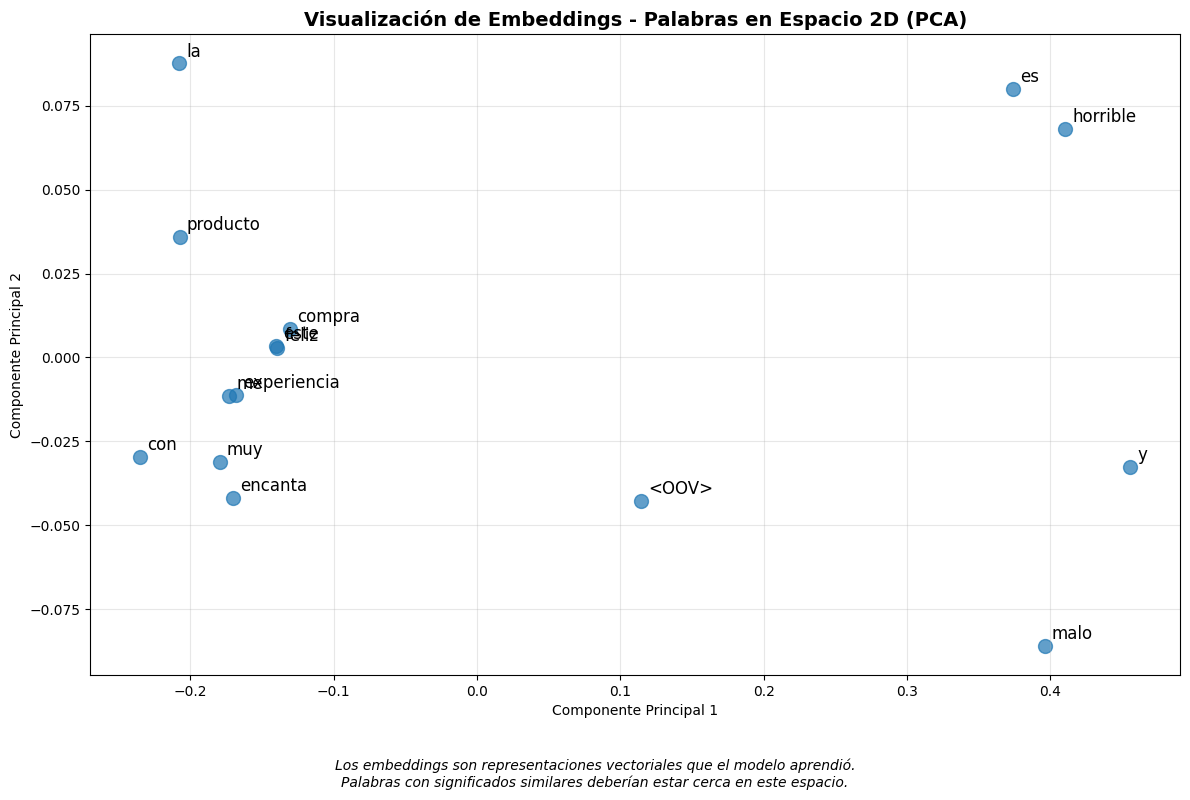

Visualización de embeddings completada


In [11]:
# SECCIÓN 9: VISUALIZACIÓN DE EMBEDDINGS Y ANÁLISIS


try:
    # 1. EXTRAER EMBEDDINGS APRENDIDOS
    print("\n EXTRAYENDO EMBEDDINGS ")
    
    capa_embedding = model.get_layer('capa_embedding')
    pesos_embedding = capa_embedding.get_weights()[0]

    print(f"Embeddings extraídos:")
    print(f"- Forma de pesos: {pesos_embedding.shape}")  # (VOCAB_SIZE, 16)
        
    # 2. PREPARAR DATOS PARA VISUALIZACIÓN
    palabras_visualizar = 15  
    palabras_indices = list(range(1, min(palabras_visualizar + 1, VOCAB_SIZE))) 
    palabras = [tokenizer.index_word.get(i, f"<{i}>") for i in palabras_indices]  
    vectores = pesos_embedding[palabras_indices] 
    
    print(f"- Palabras a visualizar: {palabras}")
    
    # 3. REDUCIR DIMENSIONALIDAD CON PCA
    from sklearn.decomposition import PCA
    
    pca = PCA(n_components=2)  
    vectores_2d = pca.fit_transform(vectores)  
    
    print(f"   - Varianza explicada por componentes: {pca.explained_variance_ratio_.sum():.2%}")  # Mide información preservada
    
    # 4. VISUALIZAR EMBEDDINGS
    plt.figure(figsize=(12, 8)) 
    
    # Crear scatter plot
    scatter = plt.scatter(vectores_2d[:, 0], vectores_2d[:, 1], alpha=0.7, s=100) 
    # Añadir etiquetas de palabras
    for i, palabra in enumerate(palabras):
        plt.annotate(palabra, (vectores_2d[i, 0], vectores_2d[i, 1]), 
                    xytext=(5, 5), textcoords='offset points', fontsize=12)
    
    plt.title('Visualización de Embeddings - Palabras en Espacio 2D (PCA)', 
              fontweight='bold', fontsize=14)
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.grid(True, alpha=0.3)
    
    # Añadir explicación
    plt.figtext(0.5, 0.01, 
                "Los embeddings son representaciones vectoriales que el modelo aprendió.\n"
                "Palabras con significados similares deberían estar cerca en este espacio.",
                ha="center", fontsize=10, style='italic')
    
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.15)
    plt.show()
    
    print("Visualización de embeddings completada")
    
except Exception as e:
    print(f"No se pudo visualizar embeddings: {e}")
    